In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Convolution2D , MaxPooling2D , Dropout , Flatten, Lambda
import cv2
import pandas as pd
import random
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import ntpath
import csv


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as npimg
import os

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense

import cv2
import pandas as pd
import random
import ntpath

## Sklearn
from sklearn.utils import shuffle

In [ ]:
!unzip IMG.zip -d /content/IMG

Archive:  IMG.zip
  inflating: /content/IMG/IMG/center_2022_05_10_11_00_20_440.jpg  
  inflating: /content/IMG/IMG/center_2022_05_10_11_00_20_544.jpg  
  inflating: /content/IMG/IMG/center_2022_05_10_11_00_20_647.jpg  
  inflating: /content/IMG/IMG/center_2022_05_10_11_00_20_770.jpg  
  inflating: /content/IMG/IMG/center_2022_05_10_11_00_20_890.jpg  
  inflating: /content/IMG/IMG/center_2022_05_10_11_00_20_992.jpg  
  inflating: /content/IMG/IMG/center_2022_05_10_11_00_21_108.jpg  
  inflating: /content/IMG/IMG/center_2022_05_10_11_00_21_209.jpg  
  inflating: /content/IMG/IMG/center_2022_05_10_11_00_21_329.jpg  
  inflating: /content/IMG/IMG/center_2022_05_10_11_00_21_454.jpg  
  inflating: /content/IMG/IMG/center_2022_05_10_11_00_21_562.jpg  
  inflating: /content/IMG/IMG/center_2022_05_10_11_00_21_667.jpg  
  inflating: /content/IMG/IMG/center_2022_05_10_11_00_21_779.jpg  
  inflating: /content/IMG/IMG/center_2022_05_10_11_00_21_888.jpg  
  inflating: /content/IMG/IMG/center_2022_05

In [ ]:
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
dataset = pd.read_csv('driving_log.csv', names = columns)
dataset.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\itsdu\OneDrive\Desktop\Ai project\sim...,C:\Users\itsdu\OneDrive\Desktop\Ai project\si...,C:\Users\itsdu\OneDrive\Desktop\Ai project\si...,0.0,0.0,0,0.000081
1,C:\Users\itsdu\OneDrive\Desktop\Ai project\sim...,C:\Users\itsdu\OneDrive\Desktop\Ai project\si...,C:\Users\itsdu\OneDrive\Desktop\Ai project\si...,0.0,0.0,0,0.000079
2,C:\Users\itsdu\OneDrive\Desktop\Ai project\sim...,C:\Users\itsdu\OneDrive\Desktop\Ai project\si...,C:\Users\itsdu\OneDrive\Desktop\Ai project\si...,0.0,0.0,0,0.000080
3,C:\Users\itsdu\OneDrive\Desktop\Ai project\sim...,C:\Users\itsdu\OneDrive\Desktop\Ai project\si...,C:\Users\itsdu\OneDrive\Desktop\Ai project\si...,0.0,0.0,0,0.000078
4,C:\Users\itsdu\OneDrive\Desktop\Ai project\sim...,C:\Users\itsdu\OneDrive\Desktop\Ai project\si...,C:\Users\itsdu\OneDrive\Desktop\Ai project\si...,0.0,0.0,0,0.000082


In [ ]:
len(r"C:\Users\itsdu\OneDrive\Desktop\Ai project\simulator-windows-64\IMG")

67

In [ ]:
center_path = ["/content/IMG/IMG/" + path[68:] for path in dataset["center"]]
right_path = ["/content/IMG/IMG/" + path[68:] for path in dataset["right"]]
left_path = ["/content/IMG/IMG/" + path[68:] for path in dataset["left"]]

In [ ]:
center_path = pd.DataFrame(center_path, columns=["center"])
right_path = pd.DataFrame(right_path, columns=["right"])
left_path = pd.DataFrame(left_path, columns=["left"])

dataset = pd.concat([center_path, left_path, right_path, dataset[["steering", "throttle", "reverse", "speed"]]], axis = 1)
dataset.head()

,center,left,right,steering,throttle,reverse,speed
0,/content/IMG/IMG/center_2022_05_10_11_00_20_44...,/content/IMG/IMG/\left_2022_05_10_11_00_20_440...,/content/IMG/IMG/\right_2022_05_10_11_00_20_44...,0.0,0.0,0,0.000081
1,/content/IMG/IMG/center_2022_05_10_11_00_20_54...,/content/IMG/IMG/\left_2022_05_10_11_00_20_544...,/content/IMG/IMG/\right_2022_05_10_11_00_20_54...,0.0,0.0,0,0.000079
2,/content/IMG/IMG/center_2022_05_10_11_00_20_64...,/content/IMG/IMG/\left_2022_05_10_11_00_20_647...,/content/IMG/IMG/\right_2022_05_10_11_00_20_64...,0.0,0.0,0,0.000080
3,/content/IMG/IMG/center_2022_05_10_11_00_20_77...,/content/IMG/IMG/\left_2022_05_10_11_00_20_770...,/content/IMG/IMG/\right_2022_05_10_11_00_20_77...,0.0,0.0,0,0.000078
4,/content/IMG/IMG/center_2022_05_10_11_00_20_89...,/content/IMG/IMG/\left_2022_05_10_11_00_20_890...,/content/IMG/IMG/\right_2022_05_10_11_00_20_89...,0.0,0.0,0,0.000082


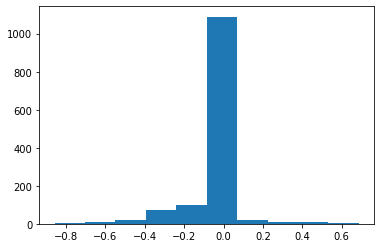

In [ ]:
plt.hist(dataset["steering"])
plt.show()

In [ ]:
count = 0
dataset["ignore_data"] = [False for i in range(len(dataset))]
for i in range(len(dataset)):
    if dataset["steering"][i] == 0:
        if count % 2 == 0:
            dataset["ignore_data"][i] = True
        count += 1
dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,center,left,right,steering,throttle,reverse,speed,ignore_data
0,/content/IMG/IMG/center_2022_05_10_11_00_20_44...,/content/IMG/IMG/\left_2022_05_10_11_00_20_440...,/content/IMG/IMG/\right_2022_05_10_11_00_20_44...,0.0,0.0,0,0.000081,True
1,/content/IMG/IMG/center_2022_05_10_11_00_20_54...,/content/IMG/IMG/\left_2022_05_10_11_00_20_544...,/content/IMG/IMG/\right_2022_05_10_11_00_20_54...,0.0,0.0,0,0.000079,False
2,/content/IMG/IMG/center_2022_05_10_11_00_20_64...,/content/IMG/IMG/\left_2022_05_10_11_00_20_647...,/content/IMG/IMG/\right_2022_05_10_11_00_20_64...,0.0,0.0,0,0.000080,True
3,/content/IMG/IMG/center_2022_05_10_11_00_20_77...,/content/IMG/IMG/\left_2022_05_10_11_00_20_770...,/content/IMG/IMG/\right_2022_05_10_11_00_20_77...,0.0,0.0,0,0.000078,False
4,/content/IMG/IMG/center_2022_05_10_11_00_20_89...,/content/IMG/IMG/\left_2022_05_10_11_00_20_890...,/content/IMG/IMG/\right_2022_05_10_11_00_20_89...,0.0,0.0,0,0.000082,True


In [ ]:
dataset = dataset[dataset["ignore_data"] == False]

In [ ]:
import matplotlib.image as npimg

In [ ]:
import cv2
# Takes image path as parameter
# Returns processed image
def image_processing(image):
    image = npimg.imread(image)
    # crop the image to ignore useless features like the sky
    image_cropped = image[65:,:,:] 
    gray = cv2.cvtColor(image_cropped, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (3,3), 0)
    cannyImage = cv2.Canny(blur, 120, 300)
    img = cv2.resize(cannyImage, (100, 100))
    img = img / 255
    return img

from sklearn.model_selection import train_test_split
images = dataset["center"]
steering = dataset["steering"]

X_train, X_test, y_train, y_test = train_test_split(images, steering, test_size = 0.2, random_state = 10)

X_train = np.array(list(map(image_processing, X_train)))
X_test = np.array(list(map(image_processing, X_test)))

In [ ]:
for i in range(len(X_train)):
    X_train[i] = np.reshape(X_train[i], (1, 100, 100))

for i in range(len(X_test)):
    X_test[i] = np.reshape(X_test[i], (1, 100, 100))

In [ ]:
image = npimg.imread(dataset["center"][45])
processed_image = image_processing(dataset["center"][45])

Text(0.5, 1.0, 'Processed Image')

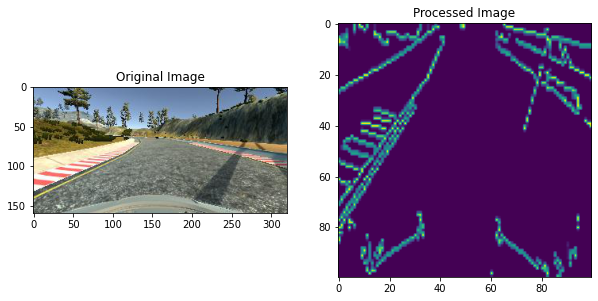

In [ ]:
f, axarr = plt.subplots(1,2, figsize=(10, 20))
axarr[0].imshow(image)
axarr[0].set_title("Original Image")
axarr[1].imshow(processed_image)
axarr[1].set_title("Processed Image")

In [ ]:
from sklearn.model_selection import train_test_split
images = dataset["center"]
steering = dataset["steering"]

X_train, X_test, y_train, y_test = train_test_split(images, steering, test_size = 0.2, random_state = 10)

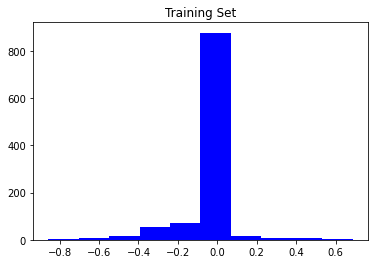

In [ ]:
plt.hist(y_train, color="blue")
plt.title("Training Set")
plt.show()

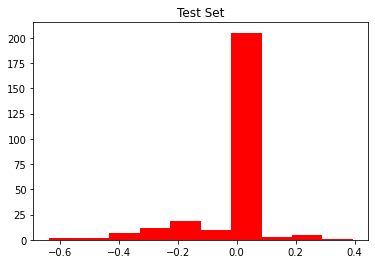

In [ ]:
plt.hist(y_test, color="red")
plt.title("Test Set")
plt.show()

In [ ]:
X_train = np.array(list(map(image_processing, X_train)))
X_test = np.array(list(map(image_processing, X_test)))

In [ ]:
from tensorflow.keras.layers import Conv2D

In [ ]:
def nvidiaBehaviourCloningCNN():
  model = Sequential()
  model.add(Conv2D(24,(5,5), strides = (2,2), input_shape= (100,100,1), activation='relu'))
  model.add(Conv2D(36,(5,5), strides = (2,2), activation = 'relu'))
  model.add(Conv2D(48,(5,5), strides = (2,2), activation = 'relu'))
  model.add(Convolution2D(64, 1, 3, activation='elu'))
  model.add(Convolution2D(64, 1, 3, activation='elu'))
  
  model.add(Flatten())
  model.add(Dense(100, activation='elu'))
  model.add(Dense(50, activation='elu'))
  model.add(Dense(10, activation='elu'))
  model.add(Dense(1))
  
  model.compile(loss='mse', optimizer = 'adam', metrics = ['accuracy'])
  return model

In [ ]:
model = nvidiaBehaviourCloningCNN()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 24)        624       
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 48)          43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 64)          3136      
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 1, 64)          4160      
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 100)               6

Epoch 1/100
17/17 [==============================] - 6s 272ms/step - loss: 0.0173 - accuracy: 0.7832 - val_loss: 0.0137 - val_accuracy: 0.7632
Epoch 2/100
17/17 [==============================] - 4s 258ms/step - loss: 0.0161 - accuracy: 0.7832 - val_loss: 0.0128 - val_accuracy: 0.7632
Epoch 3/100
17/17 [==============================] - 4s 256ms/step - loss: 0.0125 - accuracy: 0.7832 - val_loss: 0.0143 - val_accuracy: 0.7632
Epoch 4/100
17/17 [==============================] - 4s 257ms/step - loss: 0.0092 - accuracy: 0.7832 - val_loss: 0.0153 - val_accuracy: 0.7632
Epoch 5/100
17/17 [==============================] - 4s 256ms/step - loss: 0.0067 - accuracy: 0.7832 - val_loss: 0.0147 - val_accuracy: 0.7632
Epoch 6/100
17/17 [==============================] - 4s 257ms/step - loss: 0.0048 - accuracy: 0.7832 - val_loss: 0.0118 - val_accuracy: 0.7632
Epoch 7/100
17/17 [==============================] - 4s 257ms/step - loss: 0.0034 - accuracy: 0.7832 - val_loss: 0.0133 - val_accuracy: 0.7632

Text(0.5, 0, 'Epoch')

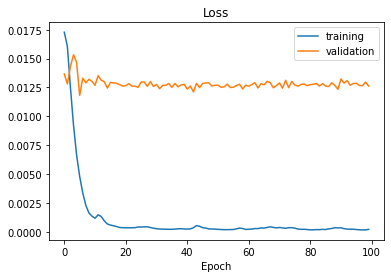

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64,  validation_data=(X_test, y_test))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')